In [2]:
import pandas as pd
import numpy as np
import plotly.plotly as py
import plotly.tools as tls
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from numpy.linalg import norm
import seaborn as sns
import time
from IPython.display import clear_output
%matplotlib inline
class ReadData(object):
    def __init__(self,datasetName='Iris.csv'):
        self.datasetName=datasetName
    def readData(self):
        df = pd.read_csv('Iris.csv')   
        df = df.drop(['Id'],axis=1)
        #rows = list(range(100,150))
        #df = df.drop(df.index[rows]) 
        Y = []
        target = df['Species']
        for val in target:
            if(val == 'Iris-setosa'):
                Y.append(0)
            elif(val=='Iris-versicolor'):
                Y.append(1)
            else:
                Y.append(2)
        df = df.drop(['Species'],axis=1)
        X = df.values.tolist()
        X=np.array(X)
        return X
r=ReadData()
X=r.readData()

{0: array([5.006, 3.418, 1.464, 0.244]), 1: array([6.18390805, 2.87011494, 4.82298851, 1.65977011])}
    Column1   Column2   Column3  Column4
0  5.006000  3.418000  1.464000  0.24400
1  6.183908  2.870115  4.822989  1.65977


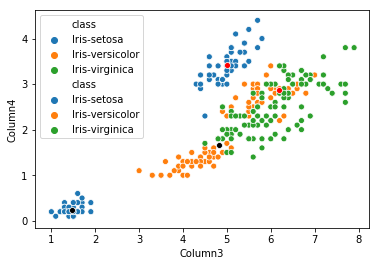

In [58]:
class MeanShift(object):
    def __init__(self,radius,numIterations=10):
        self.radius=radius
        self.numIterations=numIterations
    def initializeCentroids(self,X):
        centroids={}
        for i in range(X.shape[0]):
            centroids[i]=X[i]
        return centroids
    def getDistanceBetweenPointsAndCentroids(self,X,centroids):#using ecuclidean distance ||x-c||^2
        distance = np.zeros((X.shape[0], self.numClusters))
        for k in range(self.numClusters):
            distance[:, k] =np.square(norm(X - centroids[k, :], axis=1))
        return distance
    def updateCentroides(self,X,centroids):
        newCentroids=[]
        for i in centroids:
                inBandwidth = []
                centroid = centroids[i]
                for j in X:
                    if np.linalg.norm(j-centroid) < self.radius:
                        inBandwidth.append(j)
                newCentroids.append(tuple(np.average(inBandwidth,axis=0)))
                #print("the new centroid",newCentroids,"inBandwith",inBandwidth)
        centroidsList=sorted(list(set(newCentroids)))
        centroids = {}
        for i in range(len(centroidsList)):
            centroids[i] = np.array(centroidsList[i])
        return centroids
    def isConvergence(self,oldCentroid,currentCentroid):
        array1 = np.array(list(oldCentroid.items()))
        array2 = np.array(list(oldCentroid.items()))
        if np.all(array1==array2):
            return True
        else:
            return False
    def fit(self,X):
        self.centroids=self.initializeCentroids(X)
        for i in range(self.numIterations):
            oldCentroids=self.centroids
            self.centroids=self.updateCentroides(X,self.centroids)
            optimized = True
            for i in self.centroids:
                if not np.array_equal(self.centroids[i],oldCentroids[i]):
                    optimized = False
                if not optimized:
                    break
            if optimized:
                break
        return self.centroids
def dataVisualization():
    import pandas as pd
    iris = pd.read_csv('iris.csv', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
    print(iris.head())
def dataVizualizationSepalLenghtWidth(centroids):
    iris = pd.read_csv('iris.csv', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
    dataset = pd.DataFrame({'Column1':centroids[:,0],'Column2':centroids[:,1],'Column3':centroids[:,2],'Column4':centroids[:,3]})
    print(dataset)
    sns.scatterplot(x='sepal_length', y='sepal_width', hue='class', data=iris)
    sns.scatterplot(x='Column1', y='Column2', data=dataset,color="red")
def dataVizualizationPetalLenghtWidth(centroids):
    #current_palette = sns.color_palette()
    #sns.palplot(current_palette)
    iris = pd.read_csv('iris.csv', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
    dataset = pd.DataFrame({'Column1':centroids[:,0],'Column2':centroids[:,1],'Column3':centroids[:,2],'Column4':centroids[:,3]})
    sns.scatterplot(x='petal_length', y='petal_width', hue='class', data=iris)
    sns.scatterplot(x='Column3', y='Column4', data=dataset,color="black")
if __name__=='__main__':
    ms=MeanShift(1.65)
    centroids=ms.fit(X)
    print(centroids)
    #print("the len is ",len(centroids))
    listCentroids=[]
    for i in range(len(centroids)):
        listCentroids.append(list(centroids[i]))
    listCentroids=np.array(listCentroids)
    dataVizualizationSepalLenghtWidth(listCentroids)
    dataVizualizationPetalLenghtWidth(listCentroids)

In [12]:
import numpy as np
result = {0: 1.1181753789488595, 1: 0.5566080288678394, 2: 0.4718269778030734, 3: 0.48716683119447185, 4: 1.0, 5: 0.1395076201641266, 6: 0.20941558441558442}

names = ['id','data']
formats = ['f8','f8']
dtype = dict(names = names, formats=formats)
array = np.array(list(result.items()))

print(repr(array))

array([[0.        , 1.11817538],
       [1.        , 0.55660803],
       [2.        , 0.47182698],
       [3.        , 0.48716683],
       [4.        , 1.        ],
       [5.        , 0.13950762],
       [6.        , 0.20941558]])
